## Machine Learning Final Project 

In [11]:
import pandas as pd
from io import StringIO

path = r"C:\Users\admin\Desktop\Project_MachineLearning_12\Project_MachineLearning_12\CSV.csv"

try:
    with open(path, "r", encoding="utf-8", errors="replace") as f:
        content = f.read()

    df = pd.read_csv(StringIO(content), on_bad_lines='skip', low_memory=False)

    useful_columns = [
        "address", "city", "province", "postalCode",
        "numBedroom", "numBathroom", "yearBuilt",
        "mostRecentPriceAmount", "mostRecentRentalPriceAmount"
    ]

    filtered_cols = [col for col in useful_columns if col in df.columns]
    df_cleaned = df[filtered_cols]
    df_cleaned = df_cleaned.dropna(subset=["address", "city", "mostRecentPriceAmount"])

    df_cleaned.to_csv("cleaned_datafiniti.csv", index=False)
    print("Cleaned and saved to cleaned_datafiniti.csv")
    print(df_cleaned.head())

except Exception as e:
    print("Failed to process file:", e)


Cleaned and saved to cleaned_datafiniti.csv
Empty DataFrame
Columns: [address, city, province, postalCode, numBedroom, numBathroom, yearBuilt, mostRecentPriceAmount, mostRecentRentalPriceAmount]
Index: []


In [12]:
df.head()

,id,address,apiURLs,assessedValues,brokers,buildingName,city,companies,congressionalDistrictHouse,country,...,propertyType,province,reviews,rules,subdivision,sourceURLs,statuses,taxID,transactions,yearBuilt
0,AxZnI4wBod0R46D13pPl,1201 S MYRTLE AVE,NaN,"[{""year"":2012,""totalAmount"":257000.0},{""year"":...",NaN,NaN,CLEARWATER,NaN,112.0,US,...,Commercial,FL,NaN,NaN,Milton Park,https://www.pcpao.gov/property-details?s=15292...,"[{""date"":""2022-05-20T00:00:00.000Z"",""dateSeen""...",21-29-15-58068-003-0090,"[{""saleDate"":""1994-01-12T00:00:00.000Z"",""docum...",1963.0
1,0pT5CZgB2lpWZeFlV9nV,575 secretariat,NaN,NaN,NaN,NaN,Schertz,NaN,NaN,US,...,Rental Unit,TX,NaN,NaN,BELMONT PARK,https://www.har.com/homedetail/575-secretariat...,"[{""date"":""2025-07-14T17:26:31.775Z"",""dateSeen""...",NaN,NaN,2006.0
2,AWPNFHSbyCk2Bpf62Oiy,121 83rd Ave N,NaN,"[{""year"":2012,""totalAmount"":81819.0},{""year"":2...","[{""agent"":""Clarence Hasenbeck"",""company"":""Hase...",NaN,Saint Petersburg,NaN,89.0,US,...,Single Family Dwelling,FL,NaN,NaN,RIO VISTA SEC 6,https://us-street.api.smartystreets.com/street...,"[{""date"":""2016-03-11T00:00:00.000Z"",""dateSeen""...",NaN,"[{""saleDate"":""2003-10-28T00:00:00.000Z"",""docum...",1948.0
3,AW8MiC6F0x_BgD4ejKuX,206 Spg St,NaN,"[{""year"":2025,""totalAmount"":21378.0,""landAmoun...","[{""agent"":""Lucy Mierop"",""company"":""Re/max Mark...",NaN,Willow Springs,NaN,147.0,US,...,Single Family Dwelling,IL,NaN,NaN,Mount Forest,https://www.realestate.com.au/international/us...,"[{""dateSeen"":[""2024-01-14T12:41:49.723Z"",""2024...",18332030090000,"[{""saleDate"":""2023-07-05T00:00:00.000Z"",""docum...",1978.0
4,AW7VZhFJcWockGYk1qZP,7308 Holabird Ave,NaN,"[{""year"":2019,""totalAmount"":106833.0,""landAmou...","[{""agent"":""Thomas Rozario"",""company"":""Argent R...",NaN,Dundalk,NaN,NaN,US,...,Single Family Dwelling,MD,NaN,NaN,KIMBERLY FARMS,https://www.coldwellbanker.com/md/dundalk/7308...,"[{""date"":""2025-07-19T00:00:00.000Z"",""dateSeen""...",04121223052540,"[{""saleDate"":""2012-03-14T07:00:00.000Z"",""price...",1919.0


## Generate Dummy  Dataset



In [14]:
import random
import pandas as pd
from faker import Faker

fake = Faker()

def generate_dummy_data(n=100):
    property_types = ["Detached", "Semi-Detached", "Condo", "Townhouse"]
    cities = ["Toronto", "Ottawa", "Mississauga", "Vancouver", "Calgary"]
    provinces = ["ON", "BC", "AB", "QC"]
    country = "Canada"

    data = []

    for _ in range(n):
        city = random.choice(cities)
        province = random.choice(provinces)
        year_built = random.randint(1970, 2022)
        size = random.randint(600, 4000)
        bedrooms = random.randint(1, 5)
        bathrooms = random.randint(1, 4)
        price = size * random.uniform(300, 800)  

        data.append({
            "address": fake.street_address(),
            "city": city,
            "province": province,
            "country": country,
            "propertyType": random.choice(property_types),
            "yearBuilt": year_built,
            "size": size,
            "bedrooms": bedrooms,
            "bathrooms": bathrooms,
            "mostRecentPriceAmount": round(price, 2)
        })

    return pd.DataFrame(data)


##  Save Dummy Data to CSV

Once the dummy real estate data is generated using the `generate_dummy_data()` function, it is saved locally for further processing.


In [19]:
df_dummy = enerate_dumdf_dummy = generate_dummy_data(100)
df_dummy.to_csv("canada_housing_data.csv", index=False)

##  Load Generated Dummy Dataset



In [22]:
file_path = r"C:\Users\admin\Desktop\Project_MachineLearning_12\Project_MachineLearning_12\canada_housing_data.csv"
df = pd.read_csv(file_path)
df.head(5)


,address,city,province,country,propertyType,yearBuilt,size,bedrooms,bathrooms,mostRecentPriceAmount
0,095 Justin Well Apt. 119,Toronto,AB,Canada,Semi-Detached,2021,2808,4,1,1483267.98
1,340 Brown Glen Apt. 789,Mississauga,BC,Canada,Semi-Detached,1979,3064,5,1,1937413.21
2,248 Salazar Corners,Calgary,QC,Canada,Semi-Detached,1991,965,5,4,749564.19
3,37632 Mark Stravenue Suite 025,Ottawa,QC,Canada,Detached,2018,3917,4,1,2480225.65
4,074 Moore Spurs Suite 227,Mississauga,ON,Canada,Condo,2005,3815,1,1,2821020.06


###  Merge Cleaned Datasets


In [24]:
import pandas as pd
from io import StringIO

# Read the first file
file_path1 = r"C:\Users\admin\Desktop\Project_MachineLearning_12\Project_MachineLearning_12\canada_housing_data.csv"
df1 = pd.read_csv(file_path1)

# Read the second file (with encoding handling)
file_path2 = r"C:\Users\admin\Desktop\Project_MachineLearning_12\Project_MachineLearning_12\CSV.csv"
with open(file_path2, "r", encoding="utf-8", errors="replace") as f:
    content = f.read()
df2 = pd.read_csv(StringIO(content), on_bad_lines='skip', low_memory=False)

# Optional: keep only relevant columns from each DataFrame
useful_columns = [
    "address", "city", "province", "postalCode",
    "numBedroom", "numBathroom", "yearBuilt",
    "mostRecentPriceAmount", "mostRecentRentalPriceAmount"
]

# Filter columns that exist in each DataFrame
cols1 = [col for col in useful_columns if col in df1.columns]
cols2 = [col for col in useful_columns if col in df2.columns]

# Reduce DataFrames to only the relevant columns
df1_clean = df1[cols1]
df2_clean = df2[cols2]

# Get the common columns between both DataFrames
common_cols = list(set(cols1) & set(cols2))

df1_final = df1_clean[common_cols]
df.head()



,address,city,province,country,propertyType,yearBuilt,size,bedrooms,bathrooms,mostRecentPriceAmount
0,095 Justin Well Apt. 119,Toronto,AB,Canada,Semi-Detached,2021,2808,4,1,1483267.98
1,340 Brown Glen Apt. 789,Mississauga,BC,Canada,Semi-Detached,1979,3064,5,1,1937413.21
2,248 Salazar Corners,Calgary,QC,Canada,Semi-Detached,1991,965,5,4,749564.19
3,37632 Mark Stravenue Suite 025,Ottawa,QC,Canada,Detached,2018,3917,4,1,2480225.65
4,074 Moore Spurs Suite 227,Mississauga,ON,Canada,Condo,2005,3815,1,1,2821020.06


In [25]:
df.head()

,address,city,province,country,propertyType,yearBuilt,size,bedrooms,bathrooms,mostRecentPriceAmount
0,095 Justin Well Apt. 119,Toronto,AB,Canada,Semi-Detached,2021,2808,4,1,1483267.98
1,340 Brown Glen Apt. 789,Mississauga,BC,Canada,Semi-Detached,1979,3064,5,1,1937413.21
2,248 Salazar Corners,Calgary,QC,Canada,Semi-Detached,1991,965,5,4,749564.19
3,37632 Mark Stravenue Suite 025,Ottawa,QC,Canada,Detached,2018,3917,4,1,2480225.65
4,074 Moore Spurs Suite 227,Mississauga,ON,Canada,Condo,2005,3815,1,1,2821020.06


##  Feature Preprocessing Pipeline



In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


categorical_cols = ['city', 'province', 'country', 'propertyType']
numerical_cols = ['yearBuilt', 'size', 'bedrooms', 'bathrooms']

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_cols),
    ("num", numerical_transformer, numerical_cols)
])

df.head()


,address,city,province,country,propertyType,yearBuilt,size,bedrooms,bathrooms,mostRecentPriceAmount
0,095 Justin Well Apt. 119,Toronto,AB,Canada,Semi-Detached,2021,2808,4,1,1483267.98
1,340 Brown Glen Apt. 789,Mississauga,BC,Canada,Semi-Detached,1979,3064,5,1,1937413.21
2,248 Salazar Corners,Calgary,QC,Canada,Semi-Detached,1991,965,5,4,749564.19
3,37632 Mark Stravenue Suite 025,Ottawa,QC,Canada,Detached,2018,3917,4,1,2480225.65
4,074 Moore Spurs Suite 227,Mississauga,ON,Canada,Condo,2005,3815,1,1,2821020.06


###  Automated Feature Preprocessing Pipeline



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector as selector

# Automatically select columns
categorical_features = selector(dtype_include="object")(X)
numerical_features = selector(dtype_include=["int64", "float64"])(X)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features),
    
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numerical_features)
])

### Train Machine Learning Model with Pipeline



In [ ]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

### Feature Preprocessing Pipeline



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


preprocessor = ColumnTransformer(transformers=[
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features),

    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numerical_features)
])


### Model Training Pipeline

We

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

### Split Data for Training and Testing



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


###  Evaluate the Model


In [ ]:
for i in range(5):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]:.2f}")

Actual: 3019249.56, Predicted: 2041489.59
Actual: 1048905.06, Predicted: 1259059.38
Actual: 769596.24, Predicted: 618947.34
Actual: 1707056.02, Predicted: 1271818.38
Actual: 2253727.9, Predicted: 1801581.50


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

###  Define Multiple Regression Models



In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
for name, regressor in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", regressor)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nModel: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.4f}")

### Train, Evaluate, and Select the Best Model


# Save the best model

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

best_model = None
best_score = -float("inf")
best_name = ""

for name, regressor in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", regressor)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nModel: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.4f}")

    if r2 > best_score:
        best_score = r2
        best_model = pipeline
        best_name = name


joblib.dump(best_model, "best_model.pkl")
print(f"\n Best model saved: {best_name} (R^2: {best_score:.4f})")

### Visualize Model Performance


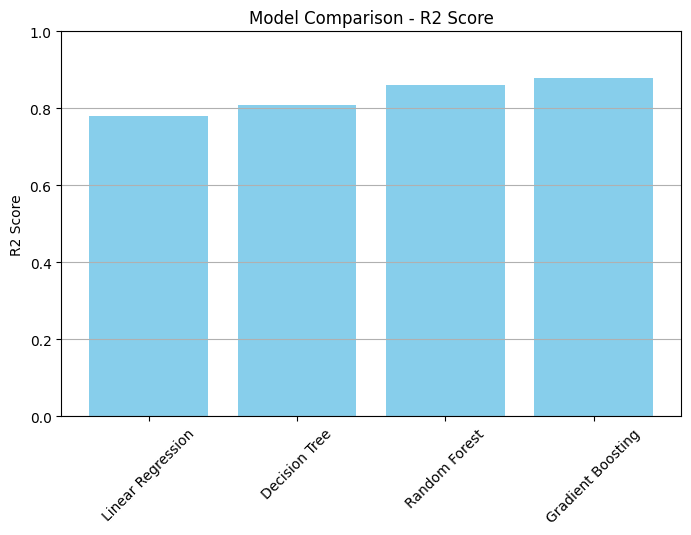

In [ ]:
import matplotlib.pyplot as plt

# Example performance data for demonstration (replace with your actual model results)
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.78, 0.81, 0.86, 0.88]
mae_scores = [32000, 30000, 27000, 25000]
rmse_scores = [40000, 38000, 35000, 33000]

# Plot R2 Score
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color='skyblue')
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


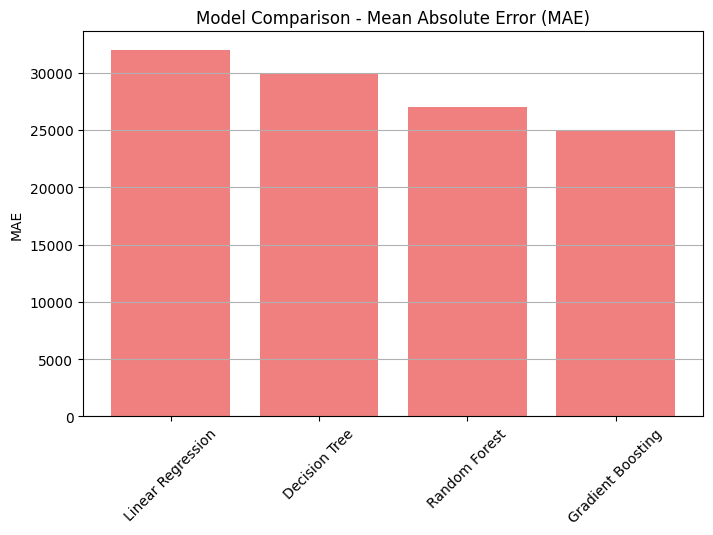

In [ ]:
# Plot MAE
plt.figure(figsize=(8,5))
plt.bar(models, mae_scores, color='lightcoral')
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()